# Criando Base de Dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
ages = np.random.randint(low=15, high=70, size=40)

ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

In [2]:
labels = []
for age in ages:
    if age < 30:
        labels.append(0)
    else:
        labels.append(1)
        
#random swap
for i in range(0, 3):
    r = np.random.randint(0, len(labels) - 1)
    if labels[r] == 0:
        labels[r] = 1
    else:
        labels[r] = 0

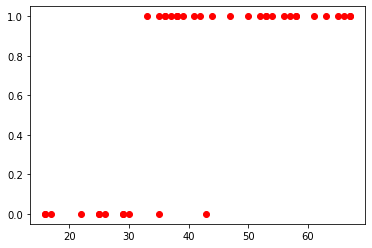

In [3]:
plt.scatter(ages, labels, color="red")
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1, 1), labels)

LinearRegression()

In [5]:
# y = m * x + b

m = model.coef_[0]
b = model.intercept_

m, b

(0.02256675230371327, -0.2573944664850354)

# Entendendo os Coeficientes da Reta

MovieWriter Pillow unavailable; using Pillow instead.


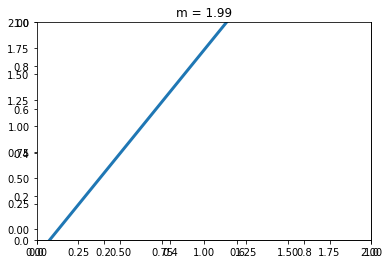

In [6]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

#markin the x-axis and y-axis
axis = plt.axes(xlim = (0, 2), ylim = (-0.1, 2))

#initializin a line variable
line, = axis.plot([],[], lw = 3)

#data which the line will
#contain(x, y)
def init():
    line.set_data([],[])
    return line,

def animate(i):
    m_copy = i * 0.01
    plt.title('m = ' + str(m_copy))
    
    x = np.arange(0.0, 10.0, 0.1)
    y = m_copy * x + b
    line.set_data(x, y)
    
    return line,

ani = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True)

ani.save('m.gif', writer='Pillow',  fps = 30)

In [7]:
from IPython.display import HTML

HTML("""
    <div align="middle">
        <img src="m.gif">
    <div>
""")

MovieWriter Pillow unavailable; using Pillow instead.


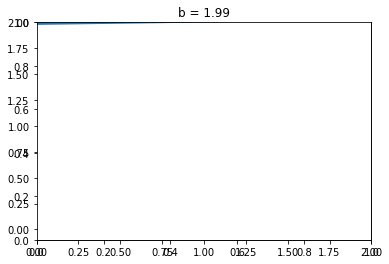

In [8]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()

#markin the x-axis and y-axis
axis = plt.axes(xlim = (0, 2), ylim = (-0.1, 2))

#initializin a line variable
line, = axis.plot([],[], lw = 3)

#data which the line will
#contain(x, y)
def init():
    line.set_data([],[])
    return line,

def animate(i):
    b_copy = i * 0.01
    plt.title('b = ' + str(b_copy))
    
    x = np.arange(0.0, 10.0, 0.1)
    y = m * x + b_copy
    line.set_data(x, y)
    
    return line,

ani = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 20, blit = True)

ani.save('b.gif', writer='Pillow',  fps = 30)

In [1]:
from IPython.display import HTML

HTML("""
    <div align="middle">
        <img src="b.gif">
    <div>
""")

# Regressão Linear daquele Conjunto de Pontos

33.56240438551759


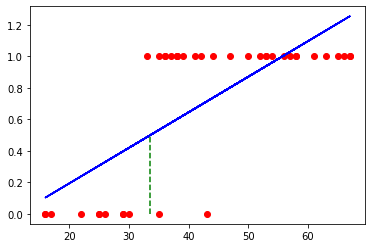

In [12]:
# y = m * x + b
# 0.5 - b = m * x
# (0.5 - b) / m = x

limiar_idade = (0.5 - b) / m

print(limiar_idade)

plt.plot(ages, ages * m + b, color = "blue")

plt.plot([limiar_idade, limiar_idade], [0, 0.5], "--", color = "green")

plt.scatter(ages, labels, color = "red")

plt.show()

 # Função Logística

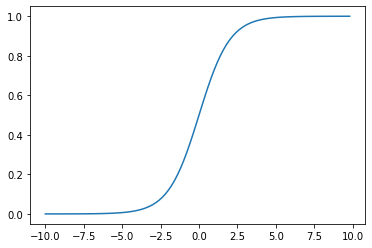

In [18]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1 / (1 + math.exp(-item)))
    return a
    
x = np.arange(-10, 10.0, 0.2)

sig = sigmoid(x)

plt.plot(x, sig)
plt.show()

# Classificador Sigmoíde

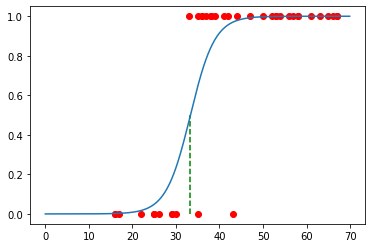

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

# y = m * x + b
m = model.coef_[0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig =  sigmoid(m * x + b)

limiar_idade = abs(b / m)

plt.scatter(ages, labels, color = "red")
plt.plot([limiar_idade, limiar_idade], [0, 0.5], "--", color = "green")
plt.plot(x, sig)
plt.show()